In [ ]:
!pip install import_ipynb

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join

import random
import os
import librosa
import librosa.display

import sklearn
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing

from google.colab import drive

drive.mount('/content/gdrive')

import sys
sys.path.append('/content/gdrive//MyDrive/VoiceRecognition/main/')
import training
# import import_ipynb
# import Training

Mounted at /content/gdrive
Mounted at /content/gdrive


In [ ]:
#파일 형식 확인 예제
#실제로 실행 X
path="/content/gdrive//MyDrive/VoiceRecognition/data/Train/zzds0028/"

audio, sr = librosa.load(path+'zzds0028-1-01-03-CJH-M-05-D.wav', sr=16000)
print('sr:', sr, ', audio shape:', audio.shape)
print('length:', audio.shape[0]/float(sr), 'secs')

mfcc = librosa.feature.mfcc(audio, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)
mfcc=mfcc.astype(float)
scaled_mfcc = sklearn.preprocessing.scale(mfcc, axis=1)

pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
padded_mfcc = pad2d(scaled_mfcc, 350)

print(scaled_mfcc.shape)
print(padded_mfcc.shape)

sr: 16000 , audio shape: (51270,)
length: 3.204375 secs
4.958163266036796
(100, 321)
(100, 350)


In [ ]:
#mfcc 방법 1(n_mfcc가 12)
DATA_PATH="/content/gdrive//MyDrive/VoiceRecognition/data/Train/"

from scipy.fftpack import dct
hop_length = 512
n_mels = 40
n_fft = 512
sr = 16000

#입력데이터 mfcc로 벡터화
#입력데이터 합치기 - datax
#알맞은 y값 할당 - datay
datax = []
datay = []

#사용자가 정한 input 길이보다 짧을 때 0으로 채워주는 함수
#pad1d = lambda a, i: a[0:i] if a.size > i else np.hstack((a, np.zeros((a.size, i-a.size))))
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))

count=0
for folder in os.listdir(DATA_PATH):
  for filename in os.listdir(DATA_PATH+folder+"/"):
    print(filename)
    y, sr = librosa.load(DATA_PATH+folder+"/"+ filename, sr=16000, mono=True, duration=15)
    y = y[0:int(15.0 * sr)]
    stft = librosa.stft(y=y, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hamm',
    center=True, dtype=np.complex64, pad_mode='reflect')
    abs_STFT = np.abs(stft)
        
    mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
    mel /= np.max(mel, axis=-1)[:, None]
    mel_S = np.dot(mel, abs_STFT)

    mel_spec_test = 20 * np.log10(np.maximum(mel_S, 1e-5))
        
    num_ceps = 12
    cep_lifter = 22
        
    mfcc = dct(mel_spec_test.T, type=2 ,axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] 
    (nframes, ncoeff) = mfcc.shape

    n = np.arange(ncoeff)
        
        
    # to de-emphasize higher MFCCs (for Noise)
    lift = 1 + (cep_lifter / 2) * np.sin(np.pi * n / cep_lifter)
    mfcc_lifted = mfcc * lift  
    mfcc_normalized = mfcc_lifted -(np.mean(mfcc_lifted, axis=0) + 1e-8)
    mfcc_normalized=mfcc_normalized.T

    print(mfcc_normalized.shape)
    print(mfcc_normalized.size)
    padded_mfcc = pad2d(mfcc_normalized, 110)
    datax.append(padded_mfcc.tolist())
    datay.append(count)
  count=count+1

datax=np.array(datax)
datay=np.array(datay)

print(datax.shape)
print(datay.shape)

In [ ]:
#mfcc 방법 2
DATA_PATH="/content/gdrive//MyDrive/VoiceRecognition/data/Train/"

#입력데이터 mfcc로 벡터화
#입력데이터 합치기 - datax
#알맞은 y값 할당 - datay
datax = []
datay = []

#사용자가 정한 input 길이보다 짧을 때 0으로 채워주는 함수
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))

count=0
for folder in os.listdir(DATA_PATH):
  for filename in os.listdir(DATA_PATH+folder+"/"):
    print(filename)
    audio, sr = librosa.load(DATA_PATH+folder+"/"+ filename, sr=16000)
    #print('length:', audio.shape[0]/float(sr), 'secs')

    mfcc = librosa.feature.mfcc(audio, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)
    #mfcc=mfcc.astype(float)
    scaled_mfcc = sklearn.preprocessing.scale(mfcc, axis=1)

    print(scaled_mfcc.shape)
    
    padded_mfcc = pad2d(scaled_mfcc, 350)

    datax.append(padded_mfcc)
    datay.append(count)
  count=count+1

datax=np.array(datax)
datay=np.array(datay)

print(datax)
print(datay)


In [ ]:
#mfcc 방법 3
DATA_PATH="/content/gdrive//MyDrive/VoiceRecognition/data/Train/"

#입력데이터 mfcc로 벡터화
#입력데이터 합치기 - datax
#알맞은 y값 할당 - datay
datax = []
datay = []

#사용자가 정한 input 길이보다 짧을 때 0으로 채워주는 함수
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))

 
count=0
for folder in os.listdir(DATA_PATH):
  for filename in os.listdir(DATA_PATH+folder+"/"):
    print(filename)
    audio, sr = librosa.load(DATA_PATH+folder+"/"+ filename, sr=16000)

    S = librosa.feature.melspectrogram(audio, sr=16000, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=20)

    delta2_mfcc = librosa.feature.delta(mfcc, order=2)

    print(delta2_mfcc.shape)
    padded_mfcc = pad2d(delta2_mfcc, 120)

    datax.append(padded_mfcc)
    datay.append(count)
  count=count+1

datax=np.array(datax)
datay=np.array(datay)

print(datax)
print(datay)

In [ ]:
#mfcc 방법 4
DATA_PATH="/content/gdrive//MyDrive/VoiceRecognition/data/Train/"

#입력데이터 mfcc로 벡터화
#입력데이터 합치기 - datax
#알맞은 y값 할당 - datay
data=[]

#사용자가 정한 input 길이보다 짧을 때 0으로 채워주는 함수
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))

 
count=0
for folder in os.listdir(DATA_PATH):
  for filename in os.listdir(DATA_PATH+folder+"/"):
    print(filename)
    audio, sr = librosa.load(DATA_PATH+folder+"/"+ filename, sr=16000)
    #print('length:', audio.shape[0]/float(sr), 'secs')

    mfcc = librosa.feature.mfcc(audio, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)
    #mfcc=mfcc.astype(float)
    scaled_mfcc = sklearn.preprocessing.scale(mfcc, axis=1)

    print(scaled_mfcc.shape)
    padded_mfcc = pad2d(scaled_mfcc, 350)

    data.append((padded_mfcc,count))
  count=count+1

random.shuffle(data)

data_mfccs = [a for (a,b) in data]
data_y = [b for (a,b) in data]

datax=np.array(data_mfccs)
datay=np.array(data_y)

print(datax)
print(datay)

In [ ]:
#mfcc 5
DATA_PATH="/content/gdrive//MyDrive/VoiceRecognition/data/Train/"

#입력데이터 mfcc로 벡터화
#입력데이터 합치기 - datax
#알맞은 y값 할당 - datay
datax = []
datay = []


count=0
for folder in os.listdir(DATA_PATH):
  for filename in os.listdir(DATA_PATH+folder+"/"):
    #print(filename)

    mfcc, delta = training.MFCC(DATA_PATH+folder+"/"+ filename)
    mfcc = mfcc.astype(float)

    datax.append(mfcc)
    datay.append(count)
  count=count+1

training.padding(datax)
datax=np.array(datax)
datay=np.array(datay)

# print(datax)
# print(datay)


In [ ]:
import csv

with open('/content/gdrive//MyDrive/VoiceRecognition/main/mfcc_datax.csv', 'w',newline='') as f: 
    write = csv.writer(f) 
    write.writerows(datax)


In [ ]:
with open('/content/gdrive//MyDrive/VoiceRecognition/main/mfcc_datay.csv', 'w',newline='') as f: 
    write = csv.writer(f) 
    write.writerow(datay)

In [ ]:
print(datax.shape)#(전체데이터개수,추출된 mfcc 특징 개수,pdadding한 입력데이터 길이)
print(datay.shape)

datay_onehot = to_categorical(datay,num_classes=50)

from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax, datay_onehot, test_size=0.3, random_state=111)

print(trnx.shape)
print(trny.shape)

(2000, 20, 262)
(2000,)
(1400, 20, 262)
(1400, 50)


In [ ]:
#아래와 같은 식
# trnx_reshape=trnx.reshape(-1,100,350,1)
# tstx_reshape=tstx.reshape(-1,100,350,1)
# trnx_reshape.shape

trnx_reshape=np.expand_dims(trnx,-1)#1차원 더 늘림
tstx_reshape=np.expand_dims(tstx,-1)
trnx_reshape.shape
print(trnx_reshape.shape)
print(trnx_reshape[0].shape)

(1400, 20, 262, 1)
(20, 262, 1)


In [ ]:
#cnn model0(convolution을 1D로)
input_shape = trnx_reshape[0].shape 

cnn_model0 = models.Sequential()

#cnn_model0.add(layers.Embedding(1000,200))
cnn_model0.add(layers.Conv1D(16,2, padding='valid',input_shape=[1200, 1]))
cnn_model0.add(layers.BatchNormalization())
cnn_model0.add(layers.Activation("relu"))
cnn_model0.add(layers.MaxPooling1D(2))

cnn_model0.add(layers.Conv1D(32,2, padding='same'))
cnn_model0.add(layers.BatchNormalization())
cnn_model0.add(layers.Activation("relu"))
cnn_model0.add(layers.Dropout(0.2))
cnn_model0.add(layers.MaxPooling1D(2))

cnn_model0.add(layers.Conv1D(64,2, padding='same'))
cnn_model0.add(layers.BatchNormalization())
cnn_model0.add(layers.Activation("relu"))
cnn_model0.add(layers.Dropout(0.2))
cnn_model0.add(layers.MaxPooling1D(2))

cnn_model0.add(layers.Flatten())

#cnn_model0.add(layers.Dense(units=128, activation="relu"))
cnn_model0.add(layers.Dense(units=10, activation="softmax"))

cnn_model0.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model0.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 1199, 16)          48        
                                                                 
 batch_normalization_21 (Bat  (None, 1199, 16)         64        
 chNormalization)                                                
                                                                 
 activation_21 (Activation)  (None, 1199, 16)          0         
                                                                 
 max_pooling1d_21 (MaxPoolin  (None, 599, 16)          0         
 g1D)                                                            
                                                                 
 conv1d_25 (Conv1D)          (None, 599, 32)           1056      
                                                                 
 batch_normalization_22 (Bat  (None, 599, 32)        

In [ ]:
#cnn model1
ip = layers.Input(shape=trnx_reshape[0].shape)

m = layers.Conv2D(32, kernel_size=(4,4), activation='relu')(ip)
m =layers. MaxPooling2D(pool_size=(4,4))(m)

m = layers.Conv2D(32*2, kernel_size=(4,4), activation='relu')(ip)
m = layers.MaxPooling2D(pool_size=(4,4))(m)

m = layers.Conv2D(32*3, kernel_size=(4,4), activation='relu')(ip)
m = layers.MaxPooling2D(pool_size=(4,4))(m)

m = layers.Flatten()(m)

m =layers.Dense(64, activation='relu')(m)

m = layers.Dense(32, activation='relu')(m)

op = layers.Dense(20, activation='softmax')(m)

model = models.Model(ip, op)

model.summary()
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 20, 262, 1)]      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 17, 259, 96)       1632      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 64, 96)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 24576)             0         
                                                                 
 dense_32 (Dense)            (None, 64)                1572928   
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                          

In [ ]:
#cnn model2
input_shape = trnx_reshape[0].shape #(100,350,1)

cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(16,(2,2), padding='same', input_shape=input_shape))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Conv2D(32,(2,2), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))

# cnn_model.add(layers.Conv2D(64,(2,2), padding='same'))
# cnn_model.add(layers.BatchNormalization())
# cnn_model.add(layers.Activation("relu"))
# cnn_model.add(layers.Dropout(0.2))
# cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(units=30, activation="relu"))
cnn_model.add(layers.Dense(units=20, activation="softmax"))

cnn_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 20, 262, 16)       80        
                                                                 
 batch_normalization_12 (Bat  (None, 20, 262, 16)      64        
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 20, 262, 16)       0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 10, 131, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 10, 131, 32)       2080      
                                                                 
 batch_normalization_13 (Bat  (None, 10, 131, 32)     

In [ ]:
#lstm 모델(30,20,10)
#print(datax.shape)
# lstm_datax=datax.reshape(-1,20,1)
# print(lstm_datax.shape)
# lstm_datay = tf.keras.utils.to_categorical(datay)

# lstm_trnx, lstm_tstx, lstm_trny, lstm_tsty = train_test_split(lstm_datax, lstm_datay, test_size=0.3, random_state=777, stratify=lstm_datay)

input_shape = trnx[0].shape
input = layers.Input(input_shape)

lstm_layer1 = layers.Bidirectional(layers.LSTM(60, return_sequences=True),merge_mode='concat')(input)
lstm_layer2= layers.LSTM(45, return_sequences=True)(lstm_layer1) 
lstm_layer3= layers.LSTM(95, return_sequences=True)(lstm_layer2) 
lstm_layer4= layers.LSTM(135, return_sequences=True)(lstm_layer3) 
lstm_layer5=layers.LSTM(10)(lstm_layer4) 
output =layers.Dense(units=50, activation='softmax')(lstm_layer5)
lstm_model = tf.keras.models.Model(input, output)

lstm_model.summary()
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20, 262)]         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 20, 120)          155040    
 nal)                                                            
                                                                 
 lstm_6 (LSTM)               (None, 20, 45)            29880     
                                                                 
 lstm_7 (LSTM)               (None, 20, 95)            53580     
                                                                 
 lstm_8 (LSTM)               (None, 20, 135)           124740    
                                                                 
 lstm_9 (LSTM)               (None, 10)                5840      
                                                           

In [ ]:
#lstm 모델
input_shape = trnx[0].shape
input = tf.keras.layers.Input(shape=input_shape)
net = tf.keras.layers.LSTM(units=20, activation='relu')(input) 
# net = tf.keras.layers.Dense(units=32, activation='relu')(net)
net = tf.keras.layers.Dense(units=20, activation='softmax')(net)
lstm_model = tf.keras.models.Model(input, net)

lstm_model.summary()
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 20, 262)]         0         
                                                                 
 lstm_9 (LSTM)               (None, 20)                22640     
                                                                 
 dense_24 (Dense)            (None, 20)                420       
                                                                 
Total params: 23,060
Trainable params: 23,060
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#history=cnn_model.fit(trnx_reshape,trny,validation_data=[tstx_reshape,tsty],batch_size=50,epochs=100)
#history=model.fit(trnx_reshape,trny,validation_data=[tstx_reshape,tsty],batch_size=50,epochs=100)
#history=cnn_model0.fit(trnx_reshape,trny,validation_data=[tstx_reshape,tsty],batch_size=50,epochs=100)
history=lstm_model.fit(trnx,trny,validation_data=[tstx,tsty],batch_size=35,epochs=100)

Epoch 1/100
40/40 [==============================] - 17s 189ms/step - loss: 3.6278 - accuracy: 0.0821 - val_loss: 3.3604 - val_accuracy: 0.0950
Epoch 2/100
40/40 [==============================] - 4s 107ms/step - loss: 3.1992 - accuracy: 0.2036 - val_loss: 3.0950 - val_accuracy: 0.2400
Epoch 3/100
40/40 [==============================] - 4s 107ms/step - loss: 2.9062 - accuracy: 0.2893 - val_loss: 2.8449 - val_accuracy: 0.2750
Epoch 4/100
40/40 [==============================] - 4s 109ms/step - loss: 2.6935 - accuracy: 0.3314 - val_loss: 2.7007 - val_accuracy: 0.3000
Epoch 5/100
40/40 [==============================] - 4s 107ms/step - loss: 2.5081 - accuracy: 0.3657 - val_loss: 2.5835 - val_accuracy: 0.3167
Epoch 6/100
40/40 [==============================] - 4s 108ms/step - loss: 2.3535 - accuracy: 0.4371 - val_loss: 2.4794 - val_accuracy: 0.3683
Epoch 7/100
40/40 [==============================] - 4s 106ms/step - loss: 2.2426 - accuracy: 0.4564 - val_loss: 2.4184 - val_accuracy: 0.353

In [ ]:
#학습모델 저장
#model.save("/content/gdrive//MyDrive/VoiceRecognition/main/model2.h5")
lstm_model.save("/content/gdrive//MyDrive/VoiceRecognition/main/lstm_model_class50.h5")

In [ ]:

new_model = tf.keras.models.load_model('/content/gdrive//MyDrive/VoiceRecognition/main/lstm_model_class50.h5')
new_model.summary()

# loss, acc = new_model.evaluate(test_images, test_labels)
# print("Restored model, accuracy: {:5.2f}%".format(100*acc))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20, 262)]         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 20, 120)          155040    
 nal)                                                            
                                                                 
 lstm_6 (LSTM)               (None, 20, 45)            29880     
                                                                 
 lstm_7 (LSTM)               (None, 20, 95)            53580     
                                                                 
 lstm_8 (LSTM)               (None, 20, 135)           124740    
                                                                 
 lstm_9 (LSTM)               (None, 10)                5840      
                                                           

In [ ]:
DATA_PATH="/content/gdrive//MyDrive/VoiceRecognition/data/Recording/"
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))

#입력데이터 mfcc로 벡터화
#입력데이터 합치기 - datax
#알맞은 y값 할당 - datay
re_datax = []
re_datay = []

test_datax=datax.tolist()
test_datay=datay.tolist()


count=20
for folder in os.listdir(DATA_PATH):
  for filename in os.listdir(DATA_PATH+folder+"/"):
    print(filename)

    mfcc, delta = training.MFCC(DATA_PATH+folder+"/"+ filename)
    mfcc = mfcc.astype(float)
    mfcc = pad2d(mfcc, 262)

    re_datax.append(mfcc)
    re_datay.append(count)

    # test_datax = np.append(test_datax, np.array(mfcc))
    test_datax.append(mfcc)
    test_datay.append(count)
  count=count+1


#training.padding(re_datax)
re_datax=np.array(re_datax)
re_datay=np.array(re_datay)
re_datay = to_categorical(re_datay,num_classes=50)

test_datax=np.array(test_datax)
test_datay=np.array(test_datay)
test_datay = to_categorical(test_datay,num_classes=50)

# test_datay = np.append(test_datay, re_datay)

test_trnx, test_tstx, test_trny, test_tsty = train_test_split(test_datax, test_datay, test_size=0.3, random_state=111)

print(test_trnx.shape)
print(test_trny.shape)

history2=new_model.fit(test_trnx,test_trny,validation_data=[test_tstx,test_tsty],batch_size=35,epochs=100)

zzds0658-998-01-02-HMM-F-04-D.wav
zzds0658-1000-01-02-HMM-F-04-D.wav
zzds0658-999-01-02-HMM-F-04-D.wav
zzds0623-902-01-02-JEC-F-03-D.wav
zzds0623-901-01-02-JEC-F-03-D.wav
zzds0623-900-01-02-JEC-F-03-D.wav
(1404, 20, 262)
(1404, 50)
Epoch 1/100
41/41 [==============================] - 18s 202ms/step - loss: 0.3454 - accuracy: 0.9224 - val_loss: 0.7792 - val_accuracy: 0.8322
Epoch 2/100
41/41 [==============================] - 5s 127ms/step - loss: 0.3700 - accuracy: 0.9081 - val_loss: 1.1811 - val_accuracy: 0.7508
Epoch 3/100
41/41 [==============================] - 6s 150ms/step - loss: 0.4986 - accuracy: 0.8818 - val_loss: 0.8845 - val_accuracy: 0.7641
Epoch 4/100
41/41 [==============================] - 5s 128ms/step - loss: 0.3759 - accuracy: 0.9017 - val_loss: 0.7186 - val_accuracy: 0.8073
Epoch 5/100
41/41 [==============================] - 5s 127ms/step - loss: 0.2420 - accuracy: 0.9416 - val_loss: 0.6953 - val_accuracy: 0.8256
Epoch 6/100
41/41 [==============================] -

In [ ]:
new_model.save("/content/gdrive//MyDrive/VoiceRecognition/main/lstm_model_class50_recordingTrain.h5")

In [ ]:
#Test 확인
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))

# audio, sr = librosa.load("/content/gdrive//MyDrive/VoiceRecognition/data/"+"Test"+"/"+ "zzds0433-41-01-03-LJY-F-04-C.wav", sr=16000)

# mfcc = librosa.feature.mfcc(audio, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)
# mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
# padded_mfcc = pad2d(mfcc, 262)
# #padded_mfcc=padded_mfcc.reshape(-1,100,350,1)

# np.argmax(lstm_model.predict(padded_mfcc))#9가 나와야함

testx=[]

for filename in os.listdir("/content/gdrive//MyDrive/VoiceRecognition/data/"+"Test"+"/"):
    print(filename)
    #audio, sr = librosa.load("/content/gdrive//MyDrive/VoiceRecognition/data/"+"Test"+"/"+ filename, sr=16000)

    mfcc, delta = training.MFCC("/content/gdrive//MyDrive/VoiceRecognition/data/"+"Test"+"/"+ filename)
    mfcc = mfcc.astype(float)
    mfcc = pad2d(mfcc, 262)
    #mfcc=mfcc.reshape(-1,20,262)
    testx.append(mfcc)


#training.padding(testx)
testx=np.array(testx)
print(trnx[0].shape)
print(testx.shape)

    #padded_mfcc=padded_mfcc.reshape(-1,100,350,1)
    #padded_mfcc=np.expand_dims(padded_mfcc,-1)
testy=[9,5,4,4,0,4,20,20,21,21,21,21,21,21,21,21]
testy=np.array(testy)
testy = to_categorical(testy,num_classes=50)


loss, acc = new_model.evaluate(testx, testy)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

# for x in testx:  
#   print(x.shape)
#   print(np.argmax(lstm_model.predict(x)))


zzds0433-41-01-03-LJY-F-04-C.wav
zzds0259-62-01-03-KYJ-F-03-D.wav
zzds0236-93-01-03-GJB-F-04-D.wav
zzds0236-92-01-03-GJB-F-04-D.wav
zzds0028-64-01-03-CJH-M-05-D.wav
zzds0236-94-01-03-GJB-F-04-D.wav
zzds0658-997-01-02-HMM-F-04-D.wav
zzds0658-996-01-02-HMM-F-04-D.wav
zzds0623-898-01-02-JEC-F-03-D.wav
zzds0623-899-01-02-JEC-F-03-D.wav
zzds0623-896-01-02-JEC-F-03-D.wav
zzds0623-895-01-02-JEC-F-03-D.wav
zzds0623-897-01-02-JEC-F-03-D.wav
zzds0623-893-01-02-JEC-F-03-D.wav
zzds0623-894-01-02-JEC-F-03-D.wav
zzds0623-892-01-02-JEC-F-03-D.wav
(20, 262)
(16, 20, 262)
1/1 [==============================] - 0s 77ms/step - loss: 3.9237 - accuracy: 0.3750
Restored model, accuracy: 37.50%


In [ ]:
ex=testx[9].reshape(-1,20,262)
sort=np.argsort(new_model.predict(ex))
print(sort)
print(new_model.predict(ex))
print(np.argmax(new_model.predict(ex)))


[[12  1 39 40 37 43 30  4  8 26 35 31 46 41 36 24 29 32 33 14 34 25 45 47
  23 49 28 48 38 44 42 27 11 22  0  6 13  3  5 10  2 19 17 16  9 21  7 20
  18 15]]
[[6.2406110e-04 5.6980163e-05 5.3354423e-03 1.5098270e-03 2.6639714e-04
  1.9646490e-03 1.3583034e-03 2.2792039e-02 2.8799151e-04 1.1063409e-02
  2.0238478e-03 5.7227048e-04 2.1795691e-05 1.5038274e-03 3.5934642e-04
  7.2464716e-01 9.7869830e-03 5.5712583e-03 1.4889193e-01 5.4628416e-03
  2.5083344e-02 2.0080537e-02 5.7935313e-04 4.6250096e-04 3.4097544e-04
  4.0661157e-04 2.9088926e-04 5.4002507e-04 4.7959370e-04 3.4101642e-04
  2.6332139e-04 3.1127935e-04 3.4137012e-04 3.4619198e-04 4.0295220e-04
  2.9959602e-04 3.3123430e-04 2.4946916e-04 5.0582277e-04 2.0196309e-04
  2.4362572e-04 3.2839109e-04 5.3300645e-04 2.5440648e-04 5.0918508e-04
  4.3834004e-04 3.1188523e-04 4.5517599e-04 4.9925910e-04 4.6835170e-04]]
15


In [ ]:
for folder in os.listdir('/content/gdrive//MyDrive/VoiceRecognition/data/Train/'):
  print(folder)

zzds0028
zzds0060
zzds0115
zzds0137
zzds0236
zzds0259
zzds0276
zzds0375
zzds0420
zzds0433
zzds0435
zzds0492
zzpw3799
zzds0016
zzds0040
zzds0131
zzds0171
zzds0187
zzds0199
zzds0229


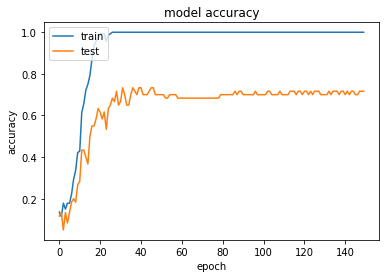

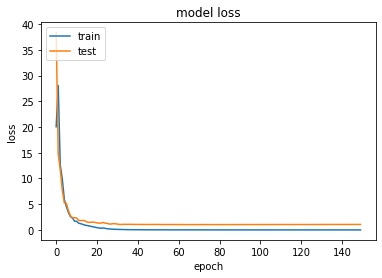

0.7166666388511658
0.7333333492279053


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
print(history.history['val_accuracy'][-1])
print(np.max(history.history['val_accuracy']))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{}, 정밀도:{}, 재현율:{}'.format(accuracy, precision, recall))